In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
plt.rc('font', family = "serif")
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [70]:
factors_precision = np.loadtxt("data/factors_precision.txt")
factors_recall = np.loadtxt("data/factors_recall.txt")

epochs_precision = np.loadtxt("data/epochs_precision.txt")
epochs_recall = np.loadtxt("data/epochs_recall.txt")

linear_test = pd.read_csv("data/test_results.csv", index_col = 0)
log_test = pd.read_csv("data/log_test_results.csv", index_col = 0)

learningcurve_precision = pd.read_csv("data/learningcurve_precision.csv", index_col = 0)
learningcurve_recall = pd.read_csv("data/learningcurve_recall.csv", index_col = 0)

#### Factors :

In [71]:
ff = factors_precision[:, 0]
fp = factors_precision[:, 1]
fr = factors_recall[:, 1]

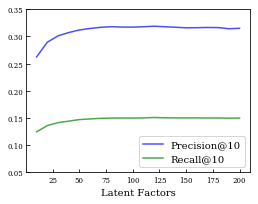

In [72]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.plot(ff, fp, alpha = 0.7, color = "blue", label = "Precision@10")
ax.plot(ff, fr, alpha = 0.7, color = "green", label = "Recall@10")
ax.set_xlabel("Latent Factors")
ax.tick_params(direction = "in")

#ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_yticks(np.arange(0.05, 0.4, 0.05))
ax.legend(loc = "lower right")
fig.savefig("bin_latentfactors.svg")
plt.show()

#### Epochs :

In [73]:
ee = epochs_precision[:, 0]
ep = epochs_precision[:, 1]
er = epochs_recall[:, 1]

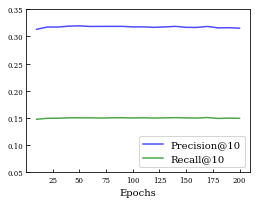

In [74]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.plot(ee, ep, alpha = 0.7, color = "blue", label = "Precision@10")
ax.plot(ee, er, alpha = 0.7, color = "green", label = "Recall@10")
ax.set_xlabel("Epochs")
ax.tick_params(direction = "in")

#ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_yticks(np.arange(0.05, 0.4, 0.05))
ax.legend(loc = "lower right")
fig.savefig("bin_epochs.svg")
plt.show()

#### Test Results :

In [75]:
means_lin = linear_test.groupby("N").mean()
means_log = log_test.groupby("N").mean()

lin_k = means_lin.index
lin_p = means_lin["precision"]
lin_r = means_lin["recall"]

log_k = means_log.index
log_p = means_log["precision"]
log_r = means_log["recall"]

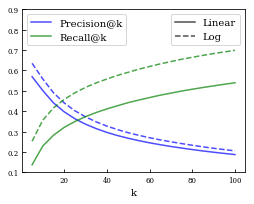

In [96]:
fig, ax = plt.subplots(figsize = (4, 3))
linp, = ax.plot(lin_k, lin_p, alpha = 0.7, color = "blue")
logp, = ax.plot(lin_k, log_p, alpha = 0.7, color = "blue", linestyle = "--")

linr, = ax.plot(lin_k, lin_r, alpha = 0.7, color = "green")
logr, = ax.plot(lin_k, log_r + 0.1, alpha = 0.7, linestyle = "--", color = "green")

dum1, = ax.plot([], [], c = "k", alpha = 0.7)
dum2, = ax.plot([], [], c = "k", alpha = 0.7, ls = "--")

legend1 = plt.legend([linp, linr], ["Precision@k", "Recall@k"], loc = "upper left")
legend2 = plt.legend([dum1, dum2], ["Linear", "Log"], loc = "upper right")
ax.add_artist(legend1)
ax.set_xlabel("k")
ax.tick_params(direction = "in")
ax.set_yticks(np.arange(0.1, 1, 0.1))
fig.savefig("bin_test.svg")
plt.show()

#### Learning Curve :

In [33]:
mean_precision = learningcurve_precision.set_index("Sparsity").mean(axis = 1)
mean_recall = learningcurve_recall.set_index("Sparsity").mean(axis = 1)
dens = 100 * (1 - mean_precision.index)
learn_p = mean_precision.values
learn_r = mean_recall.values

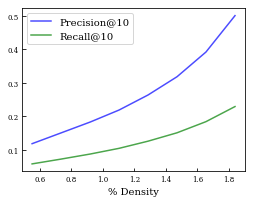

In [41]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.plot(dens, learn_p, alpha = 0.7, color = "blue", label = "Precision@10")
ax.plot(dens, learn_r, alpha = 0.7, color = "green", label = "Recall@10")
ax.set_xlabel("% Density")
ax.tick_params(direction = "in")

#ax.set_xticks([0, 20, 40, 60, 80, 100])
#ax.set_yticks(np.arange(0, 0.7, 0.1))
ax.legend(loc = "upper left")
fig.savefig("bin_learningcurve.svg")
plt.show()

In [104]:
log_p

N
5      0.634701
10     0.557973
15     0.490449
20     0.440407
25     0.402204
30     0.372073
35     0.347407
40     0.326690
45     0.309360
50     0.294207
55     0.281215
60     0.269571
65     0.259075
70     0.249547
75     0.240876
80     0.232648
85     0.224875
90     0.217833
95     0.211306
100    0.205106
Name: precision, dtype: float64